# 1 - importar as bibliotecas necessárias
Por padrão todas as bibliotecas necessárias ficam presentes no topo do código, na primeira célula

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

# 2  - Realizar análise dos dados
Este passo serve para entender os dados e suas características, que nos permite saber quais os próximos passos.

Aqui que identificamos se existem valores núlos a serem tratados, valores textuais que devem ser convertidos em numéricos...

Se tiver uma classe alvo (o que queremos prever), já sabemos que iremos utilizar um algoritmo supervisionado. A depender do tipo de dados que queremos prever, iremos fazer uma classificação ou regressão.

In [2]:
# Realiza a leitura da base de dados
df = pd.read_csv('carros_usados_data.csv')

In [6]:
df.head()

,marca,modelo,cor,combustivel,cambio,ano_fabricacao,quilometragem,potencia_motor,num_portas,num_assentos,capacidade_tanque,seguro,despesas_manutencao,tipo_pneu,opcionais,preco_venda
0,ratione,praesentium,nisi,magnam,odio,1.646533,35.995096,70.962350,28.233588,96.140778,15.991047,NaN,17.756493,odio,ab,177511
1,sint,quo,vel,molestiae,sunt,73.981168,86.601299,25.120152,32.852817,57.037081,64.982592,94.568250,1.947484,voluptatibus,deleniti,141582
2,fuga,nam,animi,aut,ipsa,80.399597,16.981968,91.319696,7.736270,26.906916,NaN,82.845537,NaN,NaN,molestiae,8742
3,sunt,quasi,et,atque,tenetur,73.087990,47.372318,60.501200,31.394366,59.021365,43.957396,84.762127,89.631724,NaN,hic,50848
4,labore,esse,possimus,odio,optio,73.467351,50.290310,NaN,31.255654,34.367575,94.020294,92.762952,6.701927,amet,optio,87917


In [3]:
# Exibe o tipo de cados das colunas
df.dtypes

marca                   object
modelo                  object
cor                     object
combustivel             object
cambio                  object
ano_fabricacao         float64
quilometragem          float64
potencia_motor         float64
num_portas             float64
num_assentos           float64
capacidade_tanque      float64
seguro                 float64
despesas_manutencao    float64
tipo_pneu               object
opcionais               object
preco_venda              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   marca                200000 non-null  object 
 1   modelo               200000 non-null  object 
 2   cor                  200000 non-null  object 
 3   combustivel          200000 non-null  object 
 4   cambio               200000 non-null  object 
 5   ano_fabricacao       200000 non-null  float64
 6   quilometragem        190000 non-null  float64
 7   potencia_motor       190000 non-null  float64
 8   num_portas           200000 non-null  float64
 9   num_assentos         200000 non-null  float64
 10  capacidade_tanque    190000 non-null  float64
 11  seguro               180000 non-null  float64
 12  despesas_manutencao  180000 non-null  float64
 13  tipo_pneu            180000 non-null  object 
 14  opcionais            180000 non-null  object 
 15  preco_venda      

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ano_fabricacao,200000.0,49.942603,28.865741,0.000424,24.920403,49.928370,75.016824,99.999838
quilometragem,190000.0,50.003177,28.859300,0.000903,25.043262,49.971887,75.013758,99.999673
potencia_motor,190000.0,50.040479,28.829261,0.000825,25.153329,50.123126,74.942837,99.999932
num_portas,200000.0,50.028658,28.856444,0.000312,25.110573,50.051021,75.013987,99.999453
num_assentos,200000.0,50.026694,28.910735,0.000325,24.958386,50.123947,75.040624,99.999875
capacidade_tanque,190000.0,49.851846,28.876648,0.001163,24.904284,49.718415,74.893923,99.999950
seguro,180000.0,50.053651,28.838199,0.000186,25.126418,50.136886,75.013189,99.999789
despesas_manutencao,180000.0,50.126500,28.870492,0.001805,25.147193,50.180715,75.167368,99.999229
preco_venda,200000.0,102583.346470,56343.136718,5001.000000,53794.750000,102480.500000,151508.000000,199999.000000


In [9]:
df.describe(include = 'O').T

,count,unique,top,freq
marca,200000,182,veniam,1194
modelo,200000,182,occaecati,1199
cor,200000,182,amet,1174
combustivel,200000,182,soluta,1210
cambio,200000,182,molestiae,1200
tipo_pneu,180000,182,accusantium,1074
opcionais,180000,182,ipsam,1079


Saber quantos valores núlos existem pode ser interessante, mas não quer dizer muita coisa. O que faz muito mais sentido é verificar a porcentagem de valores núlos.

In [10]:
# Exibe a quantidade de valores núlos por coluna
df.isna().sum()

marca                      0
modelo                     0
cor                        0
combustivel                0
cambio                     0
ano_fabricacao             0
quilometragem          10000
potencia_motor         10000
num_portas                 0
num_assentos               0
capacidade_tanque      10000
seguro                 20000
despesas_manutencao    20000
tipo_pneu              20000
opcionais              20000
preco_venda                0
dtype: int64

In [11]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

marca                   0.0
modelo                  0.0
cor                     0.0
combustivel             0.0
cambio                  0.0
ano_fabricacao          0.0
quilometragem           5.0
potencia_motor          5.0
num_portas              0.0
num_assentos            0.0
capacidade_tanque       5.0
seguro                 10.0
despesas_manutencao    10.0
tipo_pneu              10.0
opcionais              10.0
preco_venda             0.0
dtype: float64

# 3 - Tratamento dos dados
Nesta etapa realizamos todas as operações necessárias para que os dados estejam em um formato adequado para treinar as redes neurais.

- 1 - Tratar valores núlos;
- 2 - Tratar valores textuais para numéricos;
- 3 - Normalizar os dados;
- 4 - Separar os dados em X e y;
- 5 - Separar os dados em X e y de treinamento e teste.

Colunas com valores núlos:
- Numéricas:
    - 'quilometragem';
    - 'potencia_motor';
    - 'num_portas';
    - 'num_assentos';
    - 'capacidade_tanque';
    - 'seguro';
    - 'despesas_manutencao'
- Textuais:
    - 'tipo_pneu';
    - 'opcionais'.

SOMENTE com`` menos de 1% de valores núlos``, podemos excluir as linhas com valores núlos;

Com mais de 50% de valores núlos podemos excluir a coluna com valores núlos

Colunas numéricas, podemos substituir os valores núlos pela média, mediana ou moda.

Colunas textuais podemos substituir pela moda.

In [12]:
df['seguro'].mean()

50.05365104443255

In [13]:
# Valores numéricos
df.loc[df['quilometragem'].isna(), 'quilometragem'] = df['quilometragem'].mean()
df.loc[df['potencia_motor'].isna(), 'potencia_motor'] = df['potencia_motor'].median()
df.loc[df['num_portas'].isna(), 'num_portas'] = df['num_portas'].median()
df.loc[df['num_assentos'].isna(), 'num_assentos'] = df['num_assentos'].median()
df.loc[df['capacidade_tanque'].isna(), 'capacidade_tanque'] = df['capacidade_tanque'].mode()[0]
df.loc[df['seguro'].isna(), 'seguro'] = df['seguro'].mean()
df.loc[df['despesas_manutencao'].isna(), 'despesas_manutencao'] = df['despesas_manutencao'].mean()

# Valores textuais
df.loc[df['tipo_pneu'].isna(), 'tipo_pneu'] = df['tipo_pneu'].mode()[0]
df.loc[df['opcionais'].isna(), 'opcionais'] = df['opcionais'].mode()[0]

In [14]:
# Exibe a quantidade de valores núlos por coluna
df.isna().sum()

marca                  0
modelo                 0
cor                    0
combustivel            0
cambio                 0
ano_fabricacao         0
quilometragem          0
potencia_motor         0
num_portas             0
num_assentos           0
capacidade_tanque      0
seguro                 0
despesas_manutencao    0
tipo_pneu              0
opcionais              0
preco_venda            0
dtype: int64

In [15]:
# Cria uma lista com todas as colunas do tipo object
colunas_object = df.select_dtypes(include = 'object').columns.tolist()

# Exibe a lista com todas as colunas do tipo object
colunas_object

['marca', 'modelo', 'cor', 'combustivel', 'cambio', 'tipo_pneu', 'opcionais']

In [21]:
for coluna in colunas_object:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])

In [22]:
# Exibe uma lista com todas as colunas do tipo object
df.select_dtypes(include = 'object').columns.tolist()

[]

Separar os dados em X e y antes de normalizar.

In [23]:
X = df[df.columns[:-1]]
y = df[['preco_venda']]

Normalizar X e y

Em casos de classificação (onde queremos prever uma ou mais classes), não normalizamos os valores da classe alvo, normalizamos apenas os atributos. Já em regressões (que queremos prever um valor numérico contínuo), realizamos a normalização dos atributos e da classe alvo.

In [24]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


scaler_features = MinMaxScaler()
scaler_features.fit(y)
y = scaler_features.transform(y)

Separar dados em X e y de treinamento e teste com 5% para testes

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 20)

# 4 - Treinamento de uma rede neural
Para esta parte, precisamos definir o que queremos fazer.

Note que a camada de entrada da minha rede recebe o valor da quantidade de atributos (colunas de atributos);

Por padrão, as camadas ocultas (da segunda à penúltima camada), possuem a Função de ativação "relu";

A nossa última camada é a camada de saída e:
- Para regressões, possue apenas 1 neurônio e a função de ativaçõa é a "linear"
- Para classificações, possue 1 neurônio para cada classe e a função de ativação pode ser a softmax se quiser prever mais de uma classe, ou a sigmoide se desejar prever apenas uma classe.

OBS: Não existe ainda um método para definir a quantidade de camadas ocultas e quantos neurônios em cada uma. Quanto mais camadas e neurônios, mais processamento será necesário e não significa que os resultados serão melhores.


In [28]:
# Criamos uma instância do modelo de rede neural
model = Sequential()
model.add(InputLayer(input_shape = (X_train.shape[1],)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

# compila o modelo
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

# treina o modelo
model.fit(X_train, y_train, epochs = 50, verbose = 1)

predict_rn = model.predict(X_test)

Epoch 1/50
5938/5938 [==============================] - 9s 1ms/step - loss: 0.0847 - mse: 0.0847
Epoch 2/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 3/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 4/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 5/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 6/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0835 - mse: 0.0835
Epoch 7/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0835 - mse: 0.0835
Epoch 8/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0835 - mse: 0.0835
Epoch 9/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0835 - mse: 0.0835
Epoch 10/50
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0835 - mse: 0.0835
Epoch 11/50
5938/5938 [======

# 5 - Avaliação dos resultados

Como estamos fazendo uma regressão, não temos como mediar a acurácia. Em regressão, uma das melhores métricas para avaliar os resultados é o erro médio quadrátio, abreviado carinhosamente de MSE.

Para classificações, é interessante analisar a acurácia e a matriz de confusão.

Outra avaliação muito interessante é a gráfica, para compararmos os valores reais com os previstos pela rede neural.

In [30]:
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scaler_features.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_features.inverse_transform(predict_rn)

# Calcula o mse com a biblioteca do sklearn
mse = mean_squared_error(y_test_desnormalizado, predict_desnormalizado)
print("Mean squared error Regressão Linear:", mse)

Mean squared error Regressão Linear: 3204541523.7822


### ERRO MÉDIO QUADRÁTICO
Vamos imaginar que vocês estão tentando adivinhar o peso de uma melancia. Cada um de vocês faz um palpite, e depois comparamos esses palpites com o peso real da melancia. Para saber o quão bom ou ruim foram esses palpites, precisamos de uma medida que nos ajude a entender a diferença entre o palpite e o valor real.

É aí que entra o Erro Médio Quadrático. O EMQ é uma maneira de calcular o quão distante estão os nossos palpites em relação aos valores reais. Basicamente, é uma média das diferenças entre cada palpite e o valor real, mas com um pequeno truque. Em vez de simplesmente somar as diferenças, nós elevamos cada diferença ao quadrado antes de somá-las.

Mas por que elevar ao quadrado? Bem, isso tem algumas vantagens:

Sempre obtemos um valor positivo, já que o quadrado de um número negativo também é positivo. Isso é útil porque não queremos que os erros negativos e positivos se cancelem.
Dá mais peso aos erros maiores, fazendo com que as diferenças grandes sejam mais relevantes do que as pequenas.
Depois de elevar as diferenças ao quadrado e somá-las, calculamos a média desses valores, ou seja, dividimos a soma pelo número total de palpites. Por fim, para voltar à mesma escala dos nossos dados originais, tiramos a raiz quadrada dessa média.

Então, o Erro Médio Quadrático nos mostra o quanto, em média, os nossos palpites erraram em relação ao valor real. Quanto menor o EMQ, melhores foram nossos palpites!

In [31]:
#  o peso real da melancia
peso_real = 7.31

# 10 palpites
palpites = [7, 5.32, 4.73, 8.5, 5.1, 7.10, 6.9, 5.9, 6.9, 8]


# Calculando o Erro Médio Quadrático
soma_dos_quadrados = 0
for palpite in palpites:
    diferenca = palpite - peso_real
    quadrado_da_diferenca = diferenca ** 2
    soma_dos_quadrados += quadrado_da_diferenca

erro_medio_quadratico = (soma_dos_quadrados / len(palpites)) ** 0.5

print(f"O Erro Médio Quadrático dos palpites é: {erro_medio_quadratico:.2f} kg")

O Erro Médio Quadrático dos palpites é: 1.41 kg


In [32]:
# Repetindo o peso_real 10 vezes para criar uma lista com o mesmo tamanho que palpites
pesos_reais = [peso_real] * 10

# Calculando o Erro Médio Quadrático usando a função mean_squared_error do scikit-learn
mse = mean_squared_error(pesos_reais, palpites)

# Calculando a raiz quadrada do MSE para obter o RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(f"O Erro Médio Quadrático dos palpites é: {rmse:.2f} kg")


O Erro Médio Quadrático dos palpites é: 1.41 kg


In [34]:
y_test_desnormalizado = scaler_features.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_features.inverse_transform(predict_rn)


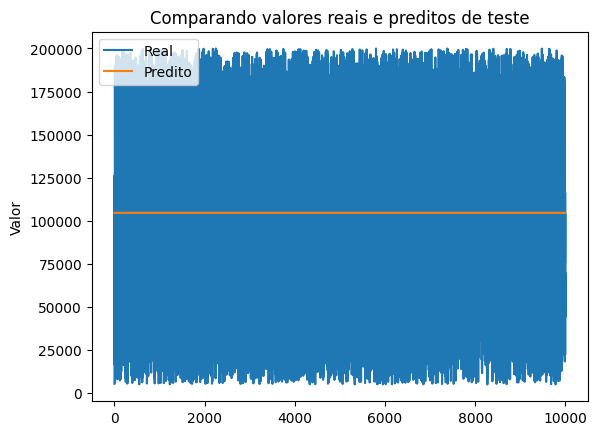

In [35]:
grafico_x = [x for x in range(1,len(y_test_desnormalizado)+1)]

plt.plot(grafico_x, y_test_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()

Repare que são muitos dados de teste para o gráfico exibir, logo, podemos reduzir esta quantidade ou utilizar o outro método de gerar gráficos...

In [36]:
# Define a função que plota o gráfico
def grafico(x_val, valy, namey, titulo, x_name, y_name, save):
    # Verifica se x_val é uma lista vazia
    if len(x_val) == 0:
        # Cria uma lista com o número de elementos na primeira lista de valy
        x_val = [x for x in range(1,len(valy[0])+1)]
    # Inicializa a lista de dados
    data = []
    # Define as cores para cada conjunto de dados
    cores = ['#DC143C','#FFB90F','#0000FF','#006400','#00FFFF','#8B008B']
    # Percorre cada conjunto de dados em valy
    for cont in range(0,len(valy)):
        # Adiciona um novo conjunto de dados na lista 'data'
        data.append(go.Scatter(x = x_val,
                    y = valy[cont],
                    mode = 'lines',
                    name = namey[cont],
                    marker = {'color': cores[cont]}))
    # Define as configurações do layout do gráfico
    layout = go.Layout(title = f'{titulo}', title_x=0.5,
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#000000'},
                   xaxis = {'title': x_name},
                   yaxis = {'title': y_name},
                   paper_bgcolor = 'rgb(188, 231, 245)',
                   plot_bgcolor = 'rgb(188, 231, 245)')
    # Cria um objeto 'Figure' do plotly com os dados e o layout
    fig = go.Figure(data=data, layout=layout)
    # Define as configurações para a legenda
    fig.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    entrywidth=200,
    y=1.15,
    xanchor="right",
    x=1,
    bgcolor = 'rgba(188, 231, 245,0.8)'
    ),
    font=dict(
            size=15,
            color="black"
        ))
    # Verifica se o parâmetro 'save' é True
    if save == True:
        # Salva o gráfico como uma imagem SVG e um arquivo HTML
        fig.write_image(f"grafico/{titulo}.svg", scale=1, width=1000, height=500)
        fig.write_html(f"grafico/{titulo}.html")
    # Verifica se o parâmetro 'save' é False
    if save == False:
        # Renderiza o gráfico na tela
        py.iplot(fig)


In [ ]:
grafico([], [y_test_desnormalizado.flatten(),predict_desnormalizado.flatten()], ['Real', 'Predito'], ' Valores reais Vs preditos de teste', '', 'Valor', False)

Porque este modelo ficou tão ruim, com o erro tão elevado?

Bem, esta é apenas uma base hipotética gerada de forma artificial para fins didáticos...

# Exercícios
Execute os passos de 1 a 5 para as duas bases de dados fictícias `ecommerce.csv` e `imoveis.csv`:

- 1 - importar as bibliotecas necessárias;

- 2  - Realizar análise dos dados;

- 3 - Tratamento dos dados;

- 4 - Treinamento de uma rede neural;

- 5 - Avaliação dos resultados.

# Ecommerce (predição de categoria)

## 1 - importar as bibliotecas necessárias;

In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## 2  - Realizar análise dos dados;

In [49]:
df = pd.read_csv('ecommerce.csv')

In [40]:
df.head()

,marca,cor,modelo,preco,avaliacao,quantidade_vendida,peso,largura,altura,desconto,comissao,tamanho,material,categoria
0,deleniti,nobis,iste,31.579758,6.602634,93.138093,NaN,7.661073,53.696641,68.550996,5.487606,totam,tempora,brinquedos
1,veritatis,quod,nulla,5.296225,4.108969,35.290993,8.164109,NaN,1.357695,4.038954,42.729479,ipsum,libero,brinquedos
2,tempore,doloremque,consequatur,84.046864,NaN,18.331377,37.108413,51.934717,66.857216,65.416435,NaN,NaN,porro,livros
3,ea,reiciendis,at,22.800814,54.490063,74.549107,NaN,35.369126,56.566021,59.431163,90.096738,NaN,ratione,brinquedos
4,rerum,repellat,quisquam,83.685646,80.561086,62.994218,53.015767,36.439035,38.479347,15.748882,12.409569,NaN,deleniti,vestuario


In [41]:
df.dtypes

marca                  object
cor                    object
modelo                 object
preco                 float64
avaliacao             float64
quantidade_vendida    float64
peso                  float64
largura               float64
altura                float64
desconto              float64
comissao              float64
tamanho                object
material               object
categoria              object
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   marca               200000 non-null  object 
 1   cor                 200000 non-null  object 
 2   modelo              200000 non-null  object 
 3   preco               190000 non-null  float64
 4   avaliacao           190000 non-null  float64
 5   quantidade_vendida  190000 non-null  float64
 6   peso                190000 non-null  float64
 7   largura             190000 non-null  float64
 8   altura              190000 non-null  float64
 9   desconto            180000 non-null  float64
 10  comissao            180000 non-null  float64
 11  tamanho             180000 non-null  object 
 12  material            180000 non-null  object 
 13  categoria           200000 non-null  object 
dtypes: float64(8), object(6)
memory usage: 21.4+ MB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preco,190000.0,50.129041,28.807193,0.000270,25.219274,50.247111,74.954184,99.999454
avaliacao,190000.0,50.048015,28.930459,0.000210,24.862820,50.028003,75.220203,99.999875
quantidade_vendida,190000.0,49.913130,28.886700,0.000468,24.861172,49.837759,74.941857,99.999997
peso,190000.0,49.946628,28.829859,0.001321,25.017071,49.908753,74.828141,99.999701
largura,190000.0,49.942379,28.874149,0.000105,24.913976,49.962590,74.991127,99.999900
altura,190000.0,50.078605,28.872941,0.000660,25.048275,50.157876,75.118590,99.999428
desconto,180000.0,49.922372,28.895326,0.000109,24.803980,49.937842,74.932082,99.999865
comissao,180000.0,49.911938,28.922378,0.000375,24.799983,49.932872,74.932320,99.999963


In [45]:
df.describe(include = 'O')

,marca,cor,modelo,tamanho,material,categoria
count,200000,200000,200000,180000,180000,200000
unique,182,182,182,182,182,5
top,neque,quas,aliquid,tempore,assumenda,brinquedos
freq,1179,1207,1194,1088,1082,40069


In [46]:
df.isna().sum()

marca                     0
cor                       0
modelo                    0
preco                 10000
avaliacao             10000
quantidade_vendida    10000
peso                  10000
largura               10000
altura                10000
desconto              20000
comissao              20000
tamanho               20000
material              20000
categoria                 0
dtype: int64

In [47]:
df.isna().sum() * 100 / len(df)

marca                  0.0
cor                    0.0
modelo                 0.0
preco                  5.0
avaliacao              5.0
quantidade_vendida     5.0
peso                   5.0
largura                5.0
altura                 5.0
desconto              10.0
comissao              10.0
tamanho               10.0
material              10.0
categoria              0.0
dtype: float64

## 3 - Tratamento dos dados;

In [50]:
df.loc[df['preco'].isna(), 'preco'] = df['preco'].median()
df.loc[df['avaliacao'].isna(), 'avaliacao'] = df['avaliacao'].median()
df.loc[df['quantidade_vendida'].isna(), 'quantidade_vendida'] = df['quantidade_vendida'].median()
df.loc[df['peso'].isna(), 'peso'] = df['peso'].median()
df.loc[df['largura'].isna(), 'largura'] = df['largura'].median()
df.loc[df['altura'].isna(), 'altura'] = df['altura'].median()
df.loc[df['desconto'].isna(), 'desconto'] = df['desconto'].median()
df.loc[df['comissao'].isna(), 'comissao'] = df['comissao'].median()

In [51]:
df.loc[df['tamanho'].isna(), 'tamanho'] = df['tamanho'].mode()[0]
df.loc[df['material'].isna(), 'material'] = df['material'].mode()[0]

In [30]:
df.isna().sum() * 100 / len(df)

marca                 0.0
cor                   0.0
modelo                0.0
preco                 0.0
avaliacao             0.0
quantidade_vendida    0.0
peso                  0.0
largura               0.0
altura                0.0
desconto              0.0
comissao              0.0
tamanho               0.0
material              0.0
categoria             0.0
dtype: float64

## 4 - Treinamento de uma rede neural;

In [52]:
colunas_object = df.select_dtypes(include = 'object').columns.tolist()
colunas_object

['marca', 'cor', 'modelo', 'tamanho', 'material', 'categoria']

In [53]:
for coluna in colunas_object:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])

In [54]:
df.select_dtypes(include = 'object').columns.tolist()

[]

In [55]:
X = df[df.columns[:-1]]
y = df[['categoria']].values

In [61]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

y_one_hot = to_categorical(y)

In [62]:
y_one_hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.05, random_state = 20)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (X_train.shape[1],)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))

model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.05)

In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 5 - Avaliação dos resultados.

In [ ]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']

# valor_y = [loss, val_loss, accuracy, val_accuracy]
# name_y = ['loss','val loss', 'accuracy', 'val_accuracy']



313/313 [==============================] - 0s 970us/step


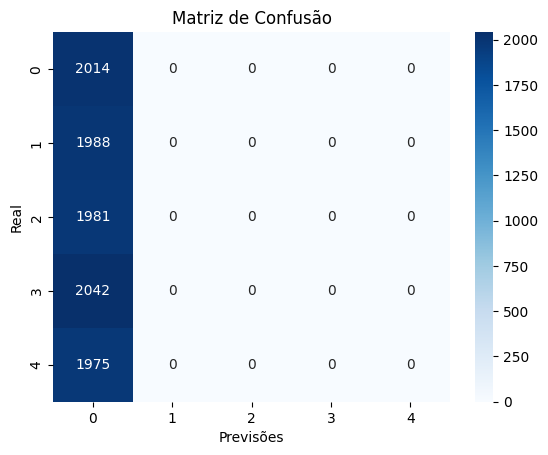

In [71]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()

# Imoveis (predição de valor)

## 1 - importar as bibliotecas necessárias

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## 2  - Realizar análise dos dados;

In [72]:
df = pd.read_csv('imoveis.csv')

In [73]:
df.head()

,bairro,tipo,estilo,area_total,area_construida,quartos,banheiros,vagas_garagem,idade_imovel,condominio,iptu,mobilia,diferenciais,preco_venda
0,sequi,impedit,nulla,15.745641,37.442807,83.568846,6.163798,24.211990,8.809863,57.570220,30.888299,autem,itaque,178464
1,alias,amet,nesciunt,25.789275,19.787780,5.713288,44.549722,43.138207,47.246028,94.374063,67.732363,expedita,eveniet,800402
2,natus,quia,quam,94.026076,46.095012,76.470387,15.974051,42.028503,98.051086,NaN,24.964126,ut,excepturi,863851
3,voluptate,optio,maiores,75.593924,72.929460,63.664253,69.469801,34.693061,79.599822,80.963561,40.546226,rerum,dolorum,842094
4,iste,in,blanditiis,73.774483,1.171677,61.633379,64.046655,66.606966,54.712599,2.502191,1.199641,nihil,quaerat,779204


In [74]:
df.dtypes

bairro              object
tipo                object
estilo              object
area_total         float64
area_construida    float64
quartos            float64
banheiros          float64
vagas_garagem      float64
idade_imovel       float64
condominio         float64
iptu               float64
mobilia             object
diferenciais        object
preco_venda          int64
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bairro           200000 non-null  object 
 1   tipo             200000 non-null  object 
 2   estilo           200000 non-null  object 
 3   area_total       190000 non-null  float64
 4   area_construida  190000 non-null  float64
 5   quartos          200000 non-null  float64
 6   banheiros        200000 non-null  float64
 7   vagas_garagem    200000 non-null  float64
 8   idade_imovel     190000 non-null  float64
 9   condominio       180000 non-null  float64
 10  iptu             180000 non-null  float64
 11  mobilia          180000 non-null  object 
 12  diferenciais     180000 non-null  object 
 13  preco_venda      200000 non-null  int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 21.4+ MB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area_total,190000.0,49.989972,28.782844,0.000162,25.136509,50.040100,74.892262,99.999489
area_construida,190000.0,49.984286,28.882228,0.000028,24.900300,50.153795,74.926583,99.999136
quartos,200000.0,49.957064,28.883103,0.000030,24.860227,50.025333,75.051046,99.999947
banheiros,200000.0,49.995873,28.856121,0.000060,24.964391,50.006142,75.071845,99.999784
vagas_garagem,200000.0,50.107350,28.833466,0.001010,25.159931,50.267896,75.018785,99.998857
idade_imovel,190000.0,49.924262,28.859808,0.000405,24.961742,49.844018,74.900586,99.999742
condominio,180000.0,50.122377,28.834959,0.000624,25.110600,50.256001,75.044160,99.999537
iptu,180000.0,49.999391,28.899215,0.000255,25.004242,49.885798,75.064423,99.999301
preco_venda,200000.0,550288.246715,260008.238728,100003.000000,324635.500000,551380.500000,775213.000000,999991.000000


In [78]:
df.describe(include = 'O')

,bairro,tipo,estilo,mobilia,diferenciais
count,200000,200000,200000,180000,180000
unique,182,182,182,182,182
top,accusantium,nobis,iste,eveniet,vero
freq,1188,1185,1186,1094,1083


In [79]:
df.isna().sum()

bairro                 0
tipo                   0
estilo                 0
area_total         10000
area_construida    10000
quartos                0
banheiros              0
vagas_garagem          0
idade_imovel       10000
condominio         20000
iptu               20000
mobilia            20000
diferenciais       20000
preco_venda            0
dtype: int64

In [80]:
df.isna().sum() * 100 / len(df)

bairro              0.0
tipo                0.0
estilo              0.0
area_total          5.0
area_construida     5.0
quartos             0.0
banheiros           0.0
vagas_garagem       0.0
idade_imovel        5.0
condominio         10.0
iptu               10.0
mobilia            10.0
diferenciais       10.0
preco_venda         0.0
dtype: float64

## 3 - Tratamento dos dados;

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bairro           200000 non-null  object 
 1   tipo             200000 non-null  object 
 2   estilo           200000 non-null  object 
 3   area_total       190000 non-null  float64
 4   area_construida  190000 non-null  float64
 5   quartos          200000 non-null  float64
 6   banheiros        200000 non-null  float64
 7   vagas_garagem    200000 non-null  float64
 8   idade_imovel     190000 non-null  float64
 9   condominio       180000 non-null  float64
 10  iptu             180000 non-null  float64
 11  mobilia          180000 non-null  object 
 12  diferenciais     180000 non-null  object 
 13  preco_venda      200000 non-null  int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 21.4+ MB


In [82]:
df.loc[df['area_total'].isna(), 'area_total'] = df['area_total'].median()
df.loc[df['area_construida'].isna(), 'area_construida'] = df['area_construida'].median()
df.loc[df['idade_imovel'].isna(), 'idade_imovel'] = df['idade_imovel'].median()
df.loc[df['condominio'].isna(), 'condominio'] = df['condominio'].median()
df.loc[df['iptu'].isna(), 'iptu'] = df['iptu'].median()


In [83]:
df.loc[df['mobilia'].isna(), 'mobilia'] = df['mobilia'].mode()[0]
df.loc[df['diferenciais'].isna(), 'diferenciais'] = df['diferenciais'].mode()[0]


In [84]:
df.isna().sum() * 100 / len(df)

bairro             0.0
tipo               0.0
estilo             0.0
area_total         0.0
area_construida    0.0
quartos            0.0
banheiros          0.0
vagas_garagem      0.0
idade_imovel       0.0
condominio         0.0
iptu               0.0
mobilia            0.0
diferenciais       0.0
preco_venda        0.0
dtype: float64

In [85]:
colunas_object = df.select_dtypes(include = 'object').columns.tolist()
colunas_object

['bairro', 'tipo', 'estilo', 'mobilia', 'diferenciais']

In [86]:
for coluna in colunas_object:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])

In [87]:
df.select_dtypes(include = 'object').columns.tolist()

[]

## 4 - Treinamento de uma rede neural;

In [89]:
X = df[df.columns[:-1]]
y = df[['preco_venda']]

In [90]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


scaler_features = MinMaxScaler()
scaler_features.fit(y)
y = scaler_features.transform(y)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 20)

In [92]:
model = Sequential()
model.add(InputLayer(input_shape = (X_train.shape[1],)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

model.fit(X_train, y_train, epochs = 20, verbose = 1)

predict_rn = model.predict(X_test)

Epoch 1/20
5938/5938 [==============================] - 8s 1ms/step - loss: 0.0846 - mse: 0.0846
Epoch 2/20
5938/5938 [==============================] - 8s 1ms/step - loss: 0.0837 - mse: 0.0837
Epoch 3/20
5938/5938 [==============================] - 8s 1ms/step - loss: 0.0837 - mse: 0.0837
Epoch 4/20
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0837 - mse: 0.0837
Epoch 5/20
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0837 - mse: 0.0837
Epoch 6/20
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 7/20
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 8/20
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 9/20
5938/5938 [==============================] - 8s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 10/20
5938/5938 [==============================] - 7s 1ms/step - loss: 0.0836 - mse: 0.0836
Epoch 11/20
5938/5938 [======

## 5 - Avaliação dos resultados.

In [93]:
y_test_desnormalizado = scaler_features.inverse_transform(y_test)

predict_desnormalizado = scaler_features.inverse_transform(predict_rn)

In [94]:
mse = mean_squared_error(y_test_desnormalizado, predict_desnormalizado)
print("Mean squared error Regressão Linear:", mse)

Mean squared error Regressão Linear: 66861884530.84418
